# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. February 2023.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [13]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

library("funFEM")
data(velib)
help("velib")
#str(velib)

velib {funFEM},R Documentation


In [14]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names


# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[, dates]
colnames(x) <- 1:length(dates)
head(x)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


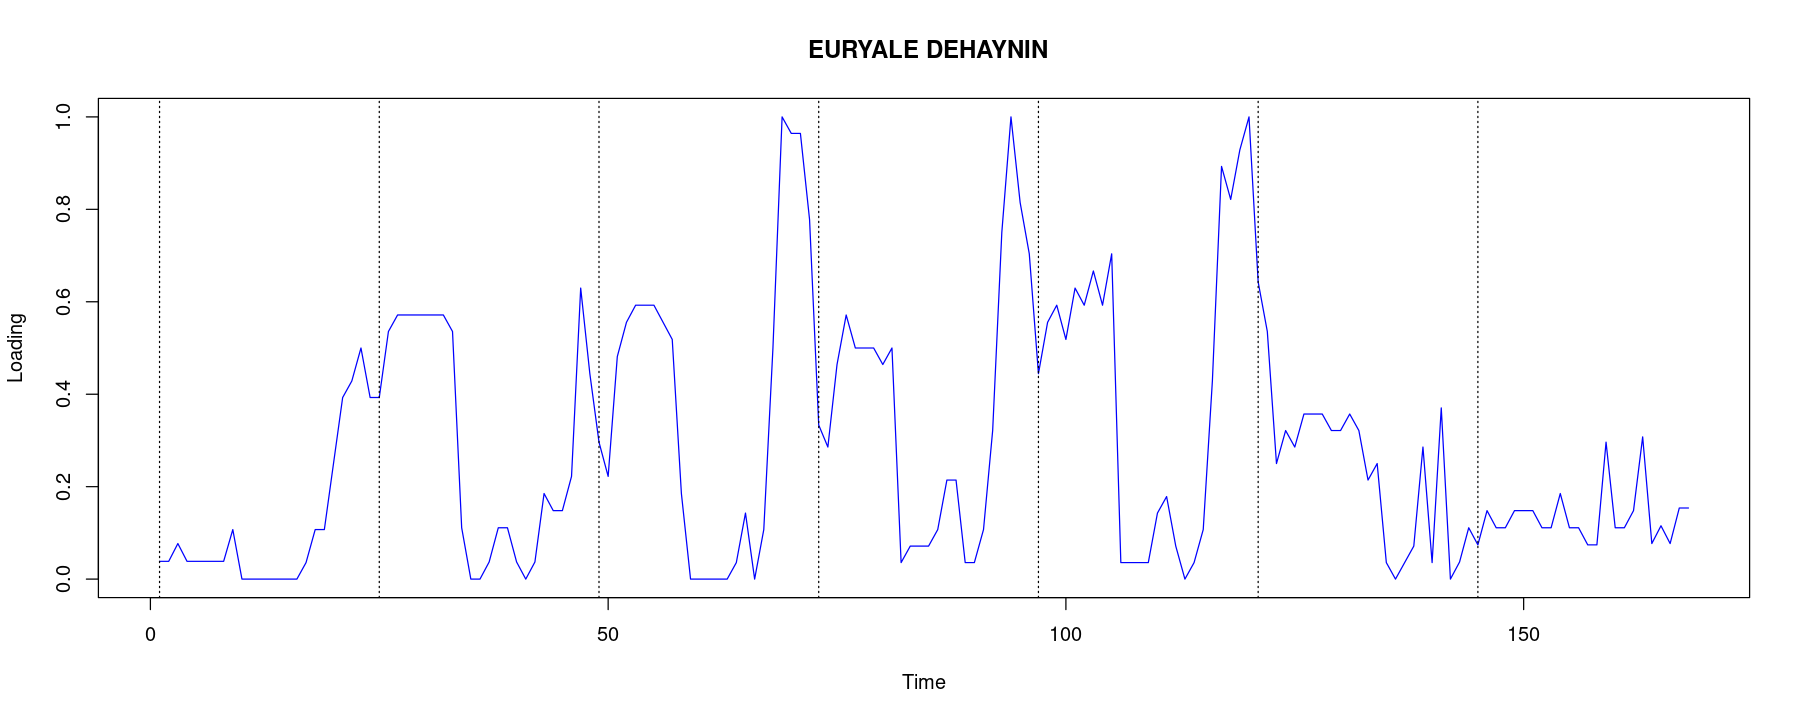

In [15]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))
options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [16]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
#rownames(x) <- 1:nrow(x)

# Descriptive statistics.

Some ideas : 

1. Draw a matrix of plots of size 4*4, corresponding to the first 16 stations. (Do not forget the vertical lines corresponding to days).
2. Draw the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?
3. Plot the average hourly loading for each day (on a single graph).
4. Plot the stations coordinates on a 2D map (latitude versus longitude). Use the package ggmap (function 'qmplot') to visualize the average loading for a given hour (6h, 12h, 23h) as a color scale.
Comments ?
5. Use a different color for stations which are located on a hill. (Use the basis 'plot' function, and the function 'qmplot' of R package ggmap).
6. Redo questions 1-3 for the subset of stations which are located on a hill. Same questions for those who are not. Comment?

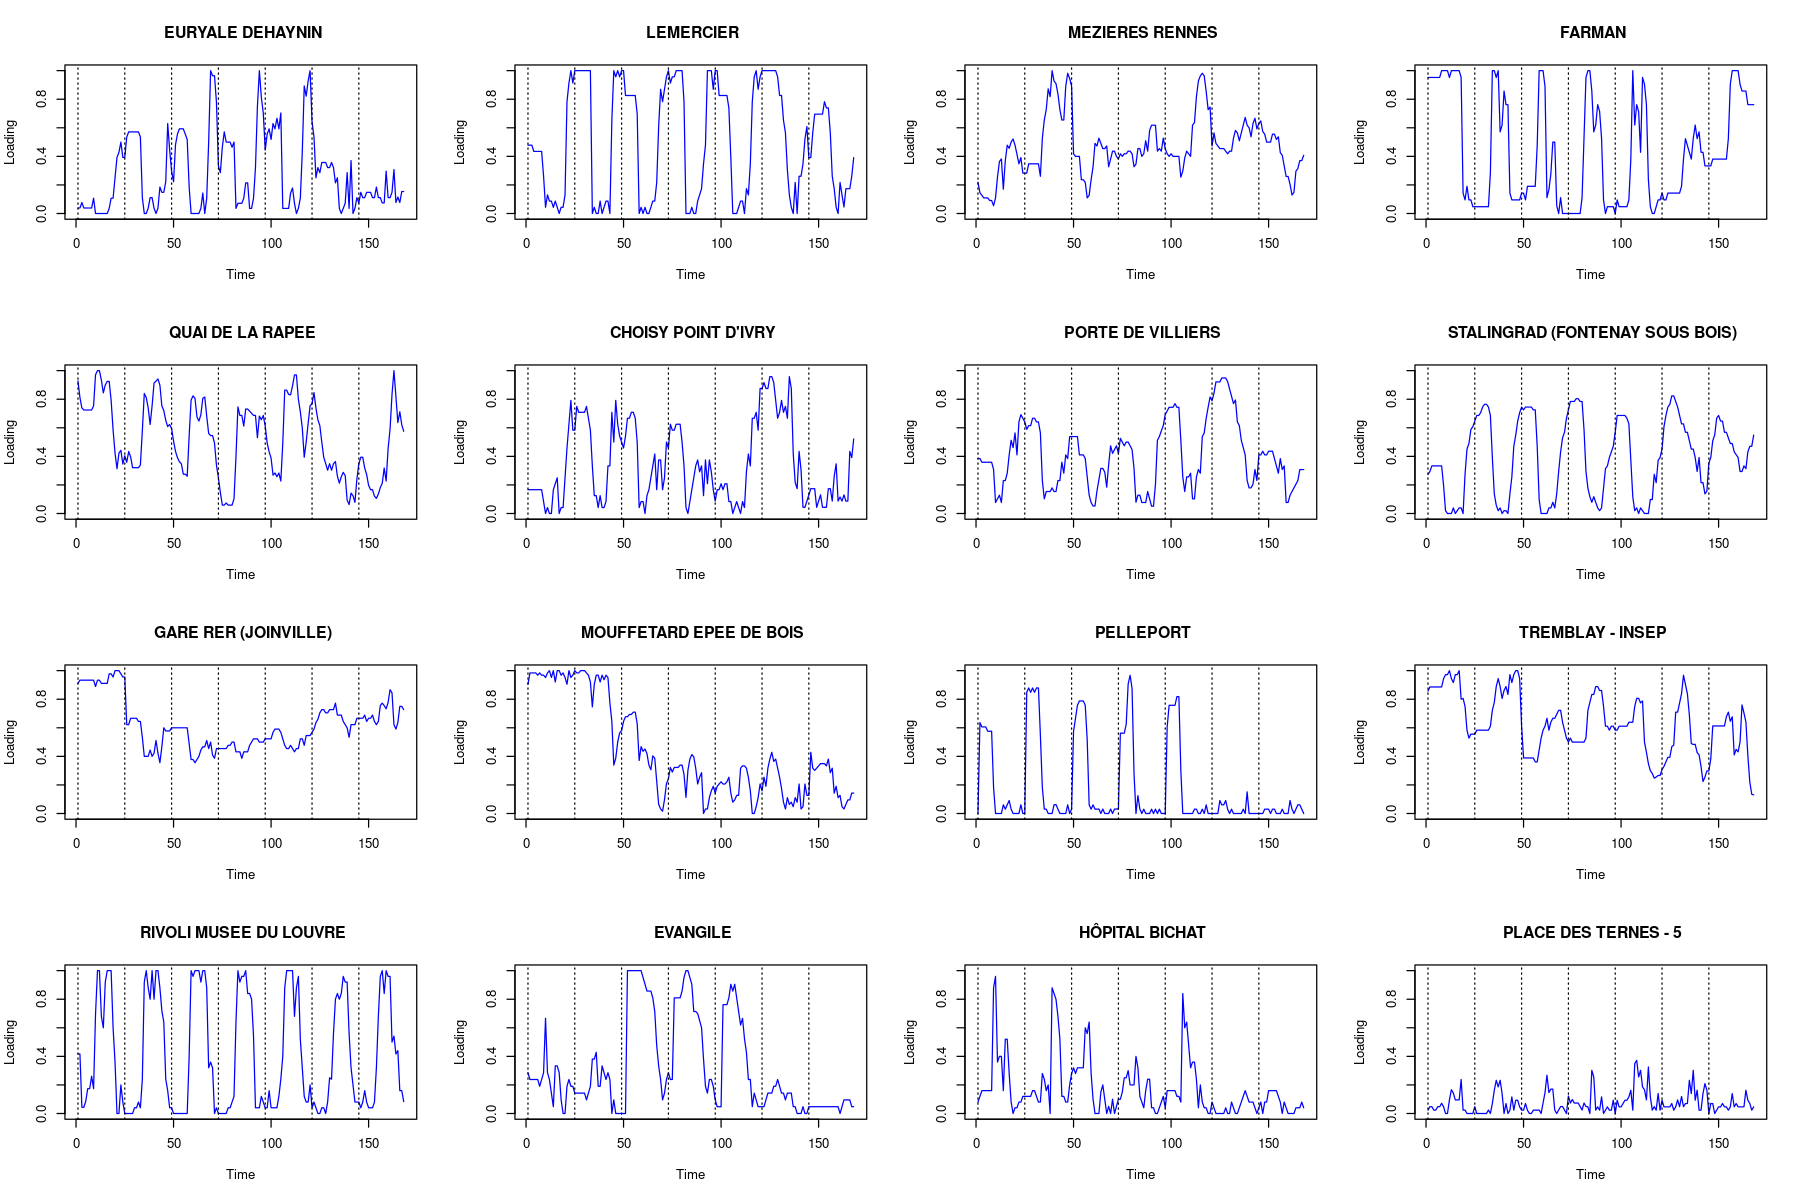

In [17]:
# Q1
par(mfrow = c(4, 4))
options(repr.plot.width = 15, repr.plot.height = 10)

for (i in 1:16){
    plot(x[i, ], col = "blue", type = "l", ylim = c(0, 1), 
         xlab = "Time", ylab = "Loading", main = velib$names[i])
    abline(v = timeTick, lty = "dotted")
}


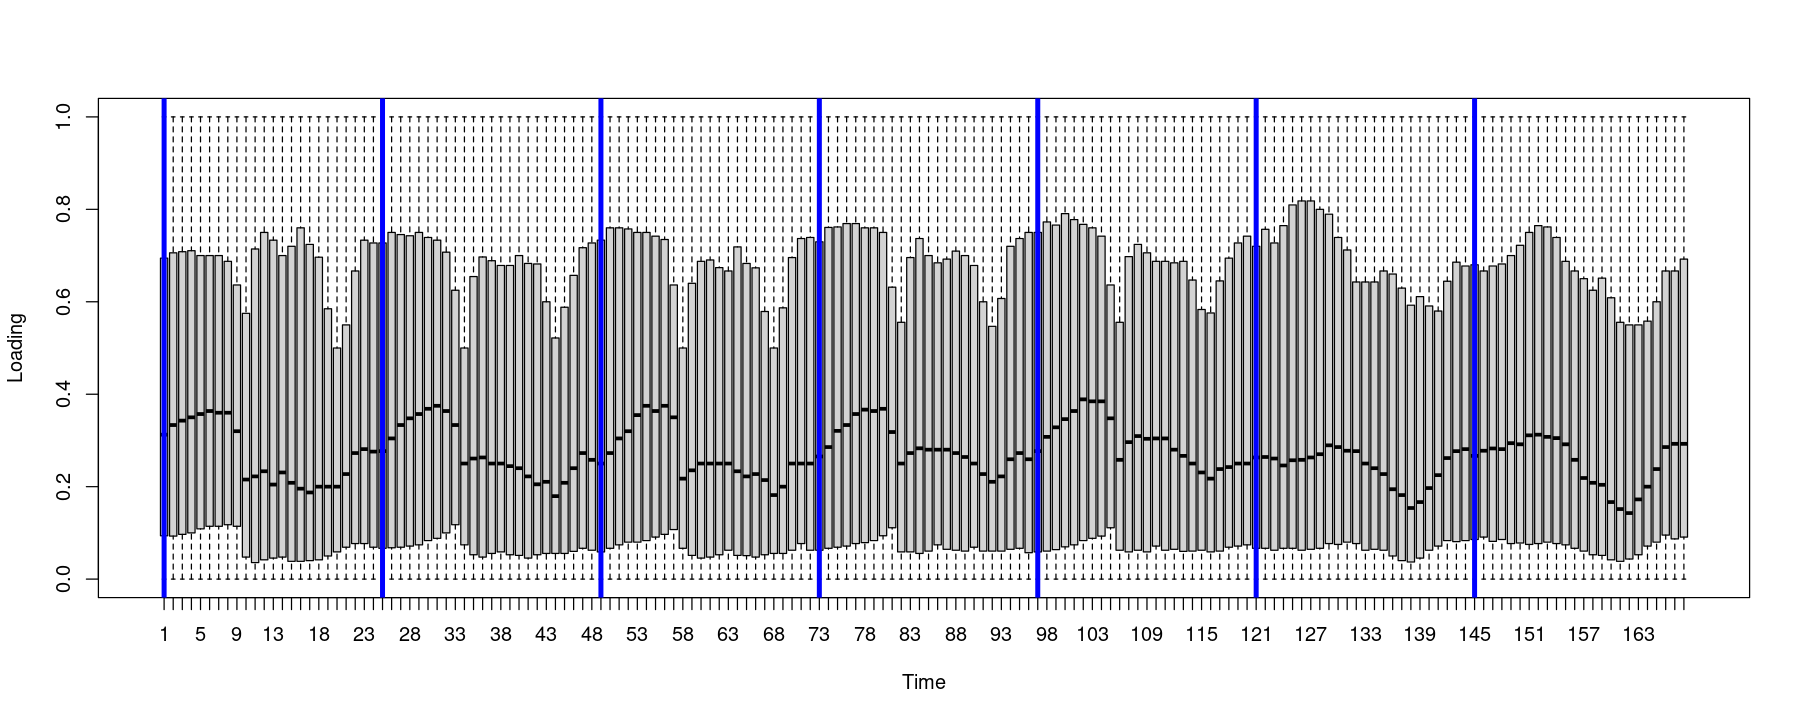

boxplot {graphics},R Documentation
formula,"a formula, such as y ~ grp, where y is a numeric vector of data values to be split into groups according to the grouping variable grp (usually a factor). Note that ~ g1 + g2 is equivalent to g1:g2."
data,a data.frame (or list) from which the variables in formula should be taken.
subset,an optional vector specifying a subset of observations to be used for plotting.
na.action,a function which indicates what should happen when the data contain NAs. The default is to ignore missing values in either the response or the group.
"xlab, ylab","x- and y-axis annotation, since R 3.6.0 with a non-empty default. Can be suppressed by ann=FALSE."
ann,logical indicating if axes should be annotated (by xlab and ylab).
"drop, sep, lex.order","passed to split.default, see there."
x,"for specifying data from which the boxplots are to be produced. Either a numeric vector, or a single list containing such vectors. Additional unnamed arguments specify further data as separate vectors (each corresponding to a component boxplot). NAs are allowed in the data."
...,"For the formula method, named arguments to be passed to the default method. For the default method, unnamed arguments are additional data vectors (unless x is a list when they are ignored), and named arguments are arguments and graphical parameters to be passed to bxp in addition to the ones given by argument pars (and override those in pars). Note that bxp may or may not make use of graphical parameters it is passed: see its documentation."
range,"this determines how far the plot whiskers extend out from the box. If range is positive, the whiskers extend to the most extreme data point which is no more than range times the interquartile range from the box. A value of zero causes the whiskers to extend to the data extremes."


In [18]:
# Q2
options(repr.plot.width = 15, repr.plot.height = 6)
stats <- boxplot(x, xlab = "Time", ylab = "Loading")
help(boxplot)
abline(v = timeTick, col = "blue", lwd = 4)

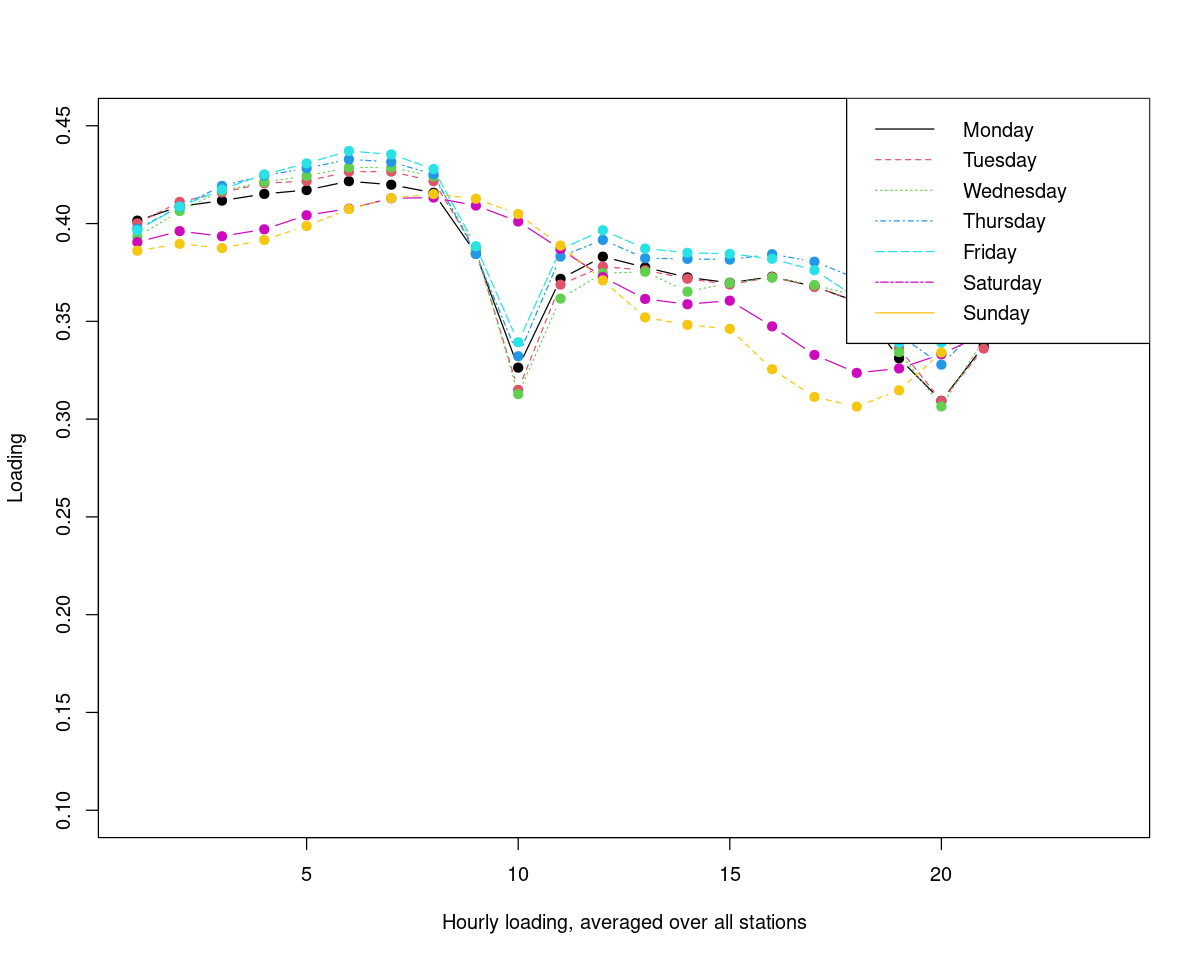

In [19]:
# Q3
xHour <- colMeans(x)
# alternatively, one can use the median returned by boxplot
# xHour <- stats$stats[3, ]
xHour <- matrix(xHour, nrow = 24)  # rearranged in columns (column 1 contains the stations 1, 2, ..., 24) 

options(repr.plot.width = 10, repr.plot.height = 8)
dayText <- c("Mon", "Tues", "Wednes", "Thurs", "Fri", "Satur", "Sun")
dayText <- paste(dayText, "day", sep = "")
matplot(xHour, type = "b", ylim = c(0.1, 0.45), col = 1:7, pch = 19, 
        xlab = "Hourly loading, averaged over all stations", ylab = "Loading")
legend("topright", dayText, lty = 1:7, col = 1:7)

In [20]:
# Q4
library(ggmap)
# Average loading for each station
load <- rowMeans(x)  
qmplot(longitude, latitude, data = velib$position, color = load)
# Average loading at 6h, 12h et 23h (the first time step is 0h)

load6 <- rowMeans(x[, seq(from = 6, by = 24, length = 7)])
load12 <- rowMeans(x[, seq(from = 13, by = 24, length = 7)])
load23 <- rowMeans(x[, seq(from = 24, by = 24, length = 7)])
# decommenter les lignes ci-dessous pour execution
#qmplot(longitude, latitude, data = velib$position, color = load6)
#qmplot(longitude, latitude, data = velib$position, color = load12)
#qmplot(longitude, latitude, data = velib$position, color = load23)


ℹ Using `zoom = 12`

ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.



ERROR: Error in curl::curl_fetch_memory(url, handle = handle): Could not resolve host: tile.stamen.com


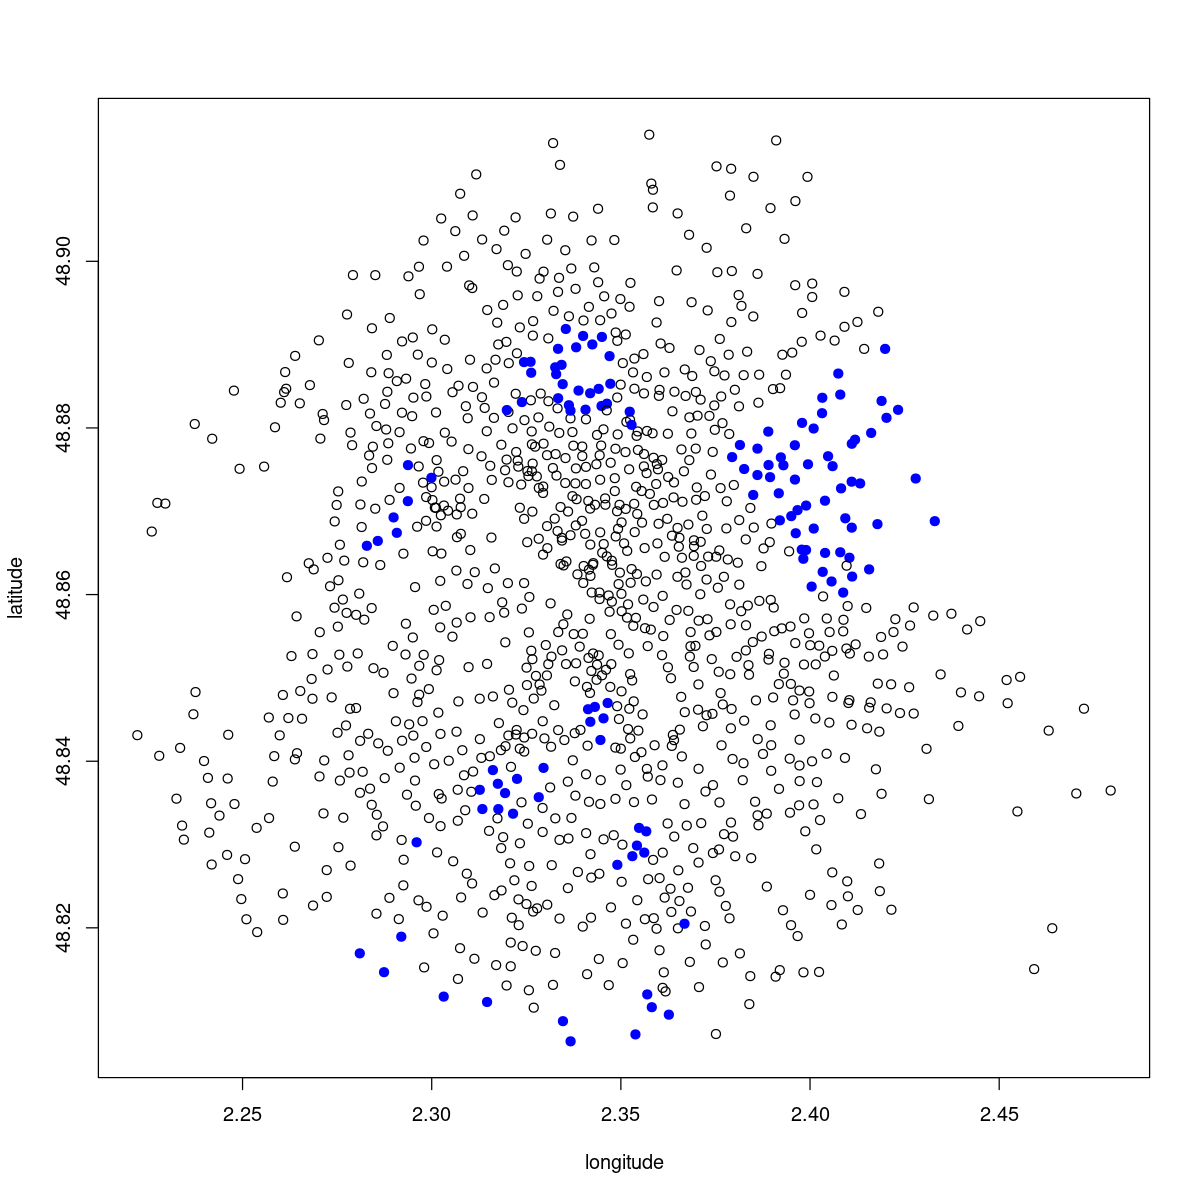

In [21]:
# Q5
options(repr.plot.width = 10, repr.plot.height = 10)
plot(velib$position, col = ifelse(velib$bonus, "blue", "black"), 
     pch = ifelse(velib$bonus, 19, 1))
# With ggmap
# Decommenter pour executer
# qmplot(longitude, latitude, data = velib$position, color = velib$bonus)

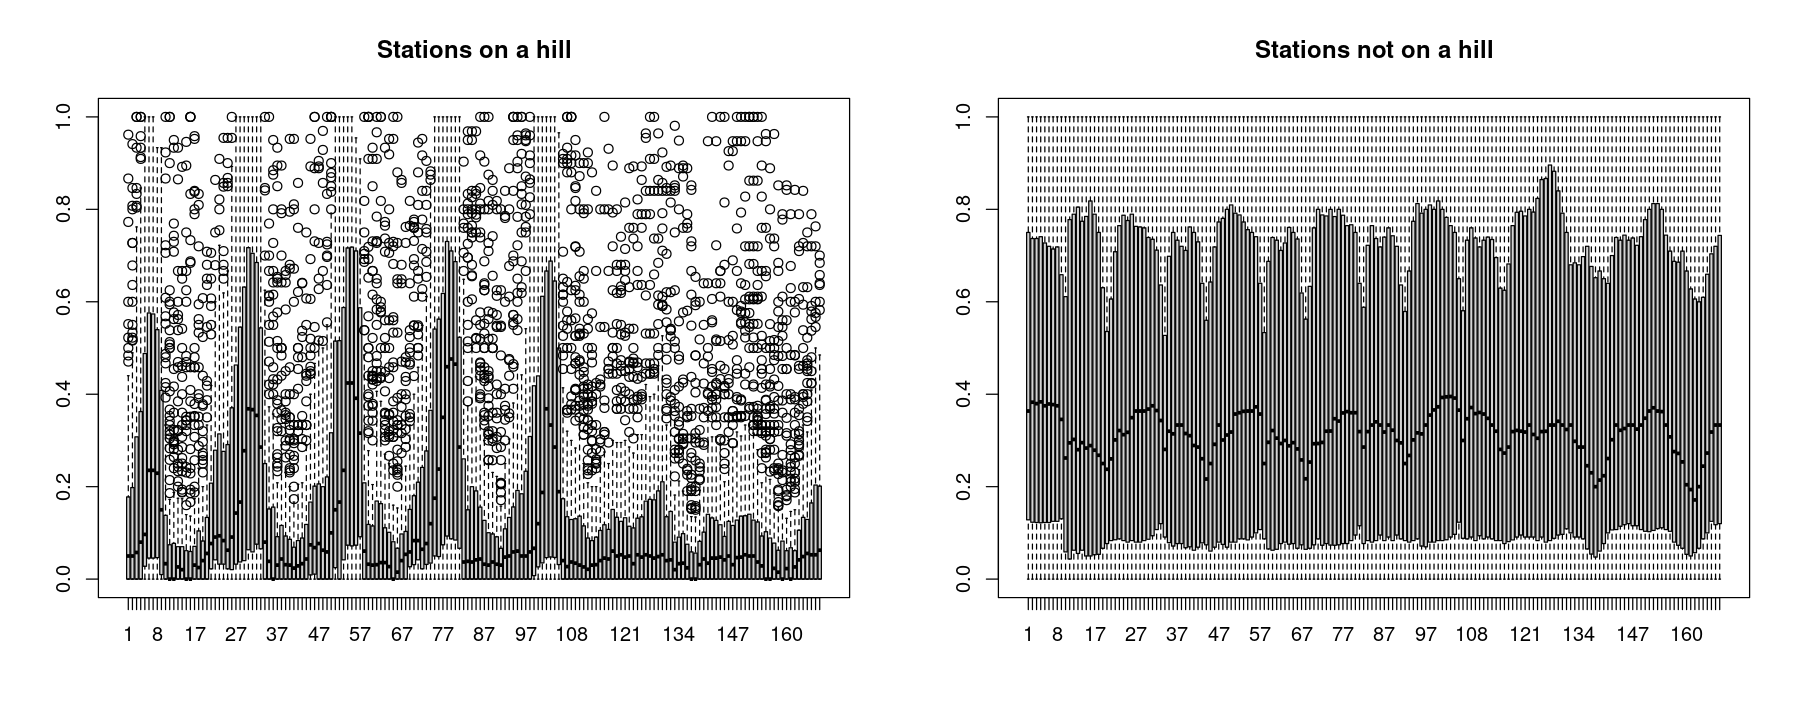

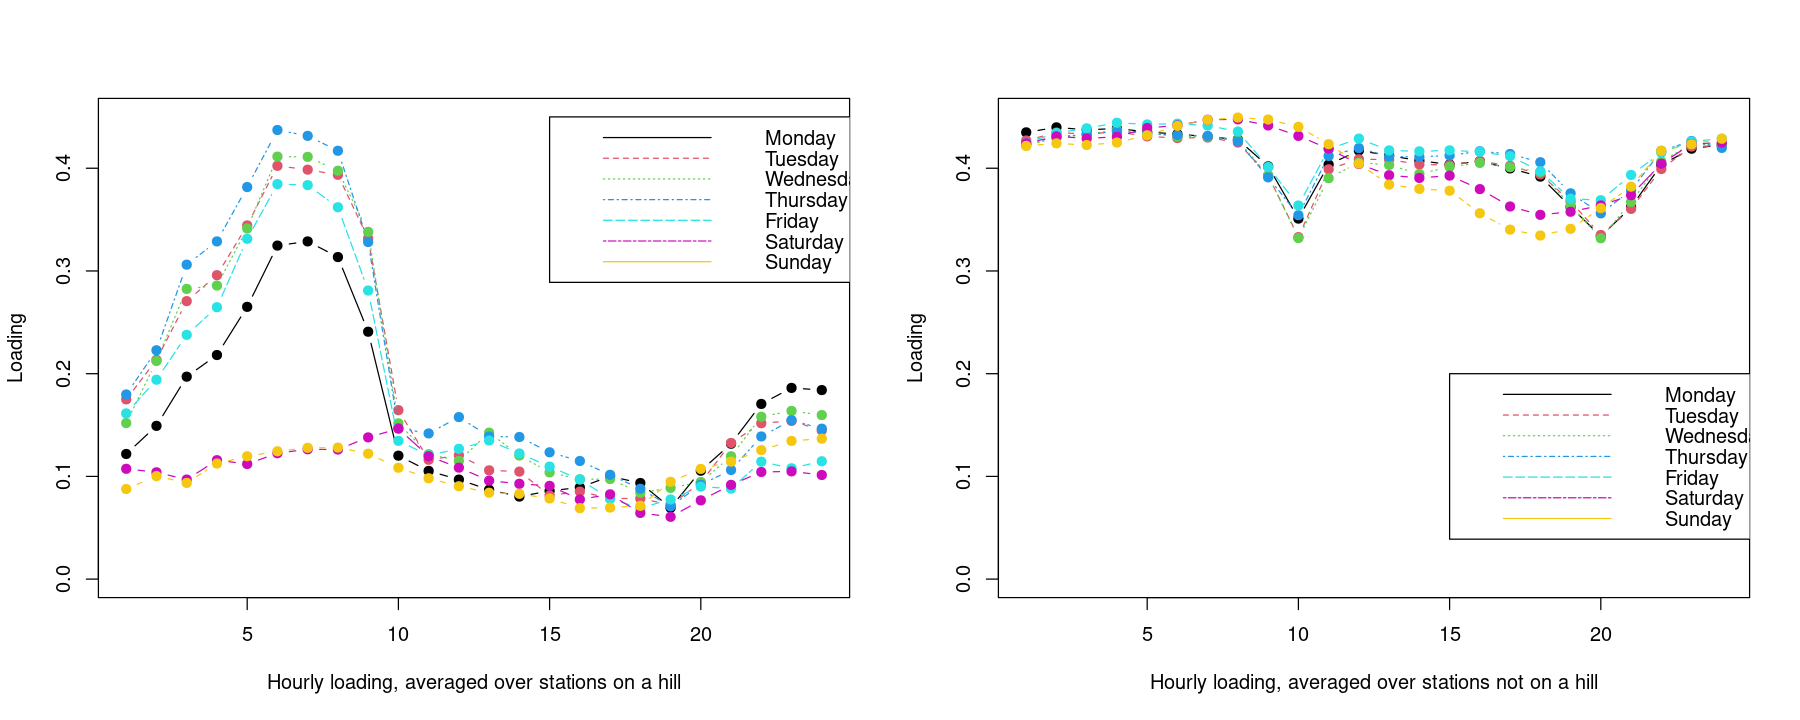

In [22]:
# Q6
xHill <- x[velib$bonus == 1, ]
xNoHill <- x[velib$bonus == 0, ]
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))
boxplot(xHill, main = "Stations on a hill")
boxplot(xNoHill, main = "Stations not on a hill")

xHourHill <- matrix(colMeans(xHill), nrow = 24)
xHourNoHill <- matrix(colMeans(xNoHill), nrow = 24)
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))
matplot(xHourHill, type = "b", ylim = c(0, 0.45), col = 1:7, pch = 19, 
        xlab = "Hourly loading, averaged over stations on a hill", ylab = "Loading")
legend(x = 15, y = 0.45, dayText, lty = 1:7, col = 1:7)
matplot(xHourNoHill, type = "b", ylim = c(0, 0.45), col = 1:7, pch = 19, 
        xlab = "Hourly loading, averaged over stations not on a hill", ylab = "Loading")
legend(x = 15, y = 0.2, dayText, lty = 1:7, col = 1:7)
